In [ ]:
#Q.2 A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
df=pd.read_csv("E:\Susmita_Backup\Data Science Course\Data Science Assignment\Random Forests\company_data.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
df.Sales.mean()

7.496325

In [7]:
df['Sales']=[1 if i>=df.Sales.mean() else 0 for i in df['Sales']]

In [8]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1,111,48,16,260,83,Good,65,10,Yes,Yes
2,1,113,35,10,269,80,Medium,59,12,Yes,Yes
3,0,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,Good,33,14,Yes,Yes
396,0,139,23,3,37,120,Medium,55,11,No,Yes
397,0,162,26,12,368,159,Medium,40,18,Yes,Yes
398,0,100,79,7,284,95,Bad,50,12,Yes,Yes


In [9]:
df=df.replace(('Yes','No'),(1,0))

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df.iloc[:,6] = labelencoder.fit_transform(df.iloc[:,6])

In [11]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,1,33,14,1,1
396,0,139,23,3,37,120,2,55,11,0,1
397,0,162,26,12,368,159,2,40,18,1,1
398,0,100,79,7,284,95,0,50,12,1,1


In [ ]:
#To remove Outliers

In [12]:
from sklearn.ensemble import IsolationForest

In [13]:
# training the model
clf = IsolationForest(random_state=10,contamination=0.01)
clf.fit(df)

IsolationForest(contamination=0.01, random_state=10)

In [14]:
pred_outliers = clf.predict(df)
pred_outliers

array([ 1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [15]:
df['Anomaly']=pred_outliers

In [16]:
df[df.Anomaly==-1]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Anomaly
5,1,124,113,13,501,72,0,78,16,0,1,-1
42,1,77,69,0,25,24,2,50,18,1,0,-1
75,1,88,111,23,480,92,0,36,16,0,1,-1
208,1,86,54,0,497,64,0,33,12,1,0,-1


In [17]:
data= df.drop(df.index[[5,42,75,208]],axis=0).reset_index()

In [18]:
data

,index,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Anomaly
0,0,1,138,73,11,276,120,0,42,17,1,1,1
1,1,1,111,48,16,260,83,1,65,10,1,1,1
2,2,1,113,35,10,269,80,2,59,12,1,1,1
3,3,0,117,100,4,466,97,2,55,14,1,1,1
4,4,0,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,395,1,138,108,17,203,128,1,33,14,1,1,1
392,396,0,139,23,3,37,120,2,55,11,0,1,1
393,397,0,162,26,12,368,159,2,40,18,1,1,1
394,398,0,100,79,7,284,95,0,50,12,1,1,1


In [20]:
data=data.drop(['Anomaly','index'],axis=1)

In [21]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
391,1,138,108,17,203,128,1,33,14,1,1
392,0,139,23,3,37,120,2,55,11,0,1
393,0,162,26,12,368,159,2,40,18,1,1
394,0,100,79,7,284,95,0,50,12,1,1


In [22]:
data.Sales.value_counts()

0    201
1    195
Name: Sales, dtype: int64

C:\Users\Susmita Ranpise\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


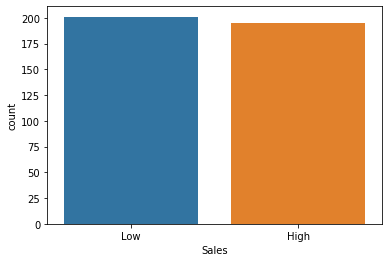

In [26]:
g=sns.countplot(data['Sales'])
g.set_xticklabels(["Low","High"])
plt.show()

In [27]:
#Dividing the data
x=data.iloc[:,1:]
y = data.iloc[:,0]

In [ ]:
#normalize the data by MinMax scaller

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaling = MinMaxScaler()
X= scaling.fit_transform(x)

In [ ]:
#Split data into Train Test split

In [30]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=0)

In [31]:
Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape

((316, 10), (80, 10), (316,), (80,))

In [ ]:
# Building a model using Entropy criteria

In [57]:
model=RandomForestClassifier(n_estimators=100,max_depth=10,criterion='entropy')
model.fit(Xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=10)

In [58]:
model.score(Xtest,ytest)

0.8125

In [59]:
pred=model.predict(Xtest)
pred

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

In [65]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [64]:
acc=accuracy_score(ytest,pred)
print('Accuracy=',acc)
print(classification_report(ytest,pred))

Accuracy= 0.8125
              precision    recall  f1-score   support

           0       0.78      0.80      0.79        35
           1       0.84      0.82      0.83        45

    accuracy                           0.81        80
   macro avg       0.81      0.81      0.81        80
weighted avg       0.81      0.81      0.81        80



In [66]:
confusion_matrix(ytest,pred)

array([[28,  7],
       [ 8, 37]], dtype=int64)

In [ ]:
#Grid Search CV

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [69]:
parameters=[{'n_estimators':[100,200,300,500,800,1200], 'criterion': ['entropy', 'gini'], 'max_depth':[5,8,10,15,20,25,30]}]
classifier=RandomForestClassifier(random_state=1)
estimator=classifier
cl=GridSearchCV(estimator,parameters,cv=10)
cl.fit(X,y)

print(cl.best_score_)
print(cl.best_params_)

0.8155128205128206
{'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 500}


In [ ]:
#Using this parameters

In [70]:
model1=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=15)
model1.fit(Xtrain,ytrain)
pred1=model1.predict(Xtest)
pred1

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

In [71]:
model1.score(Xtest,ytest)

0.8125

In [72]:
acc1=accuracy_score(ytest,pred1)
print('Accuracy=',acc1)
print(classification_report(ytest,pred1))

Accuracy= 0.8125
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        35
           1       0.83      0.84      0.84        45

    accuracy                           0.81        80
   macro avg       0.81      0.81      0.81        80
weighted avg       0.81      0.81      0.81        80



In [73]:
confusion_matrix(ytest,pred1)

array([[27,  8],
       [ 7, 38]], dtype=int64)

In [77]:
pd.Series(pred1).value_counts()

1    46
0    34
dtype: int64

In [74]:
pd.DataFrame({'ytest':ytest, 'Predicted':pred1})

,ytest,Predicted
300,1,1
319,1,1
318,1,0
65,1,1
59,0,0
...,...,...
140,0,0
142,1,1
307,0,0
146,1,1


In [ ]:
#Model Validatiion

In [ ]:
#Using KFold cross validation

In [80]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds =10
seed = 200

kfold = KFold(n_splits=num_folds, random_state=None)
model2 = RandomForestClassifier(n_estimators=500,max_depth=15,criterion='entropy',random_state =1)
results = cross_val_score(model2,X,y,cv=kfold)

print(results.mean()*100.0)
print(results.std()*100)

81.57692307692308
5.565136380384708


In [ ]:
#Using Leave One Out Cross Validation

In [83]:
from sklearn.model_selection import LeaveOneOut


In [84]:
loocv = LeaveOneOut()
model_LOO = RandomForestClassifier(n_estimators=500,criterion = 'entropy',max_depth=15)
result = cross_val_score(model_LOO, X,y, cv=loocv)

In [85]:
print(result.mean()*100.0)
print(result.std()*100)

80.55555555555556
39.57724124659724
